In [1]:
import pandas as pd
con = pd.read_excel('ConcreteStrength.xlsx')
con

C:\Users\deepa\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Air Entrainment,Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990000
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272286
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450356
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080000
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820000
...,...,...,...,...,...,...,...,...,...,...
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,No,49.970000
99,100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,No,50.230000
100,101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,Yes,43.460575
101,102,297.1,40.9,239.9,194.0,7.5,908.9,651.8,Yes,44.639464


In [2]:
list(con.columns)

['No',
 'Cement',
 'Slag',
 'Fly ash',
 'Water',
 'SP',
 'Coarse Aggr.',
 'Fine Aggr.',
 'Air Entrainment',
 'Compressive Strength (28-day)(Mpa)']

In [3]:
con.rename(columns = {'Fly ash' : 'FlyAsh', 'Coarse Aggr.': 'CoarseAgg', 'Fine Aggr.':'FineAgg', 'Air Entrainment':'AirEntrain',
          'Compressive Strength (28-day)(Mpa)':'Strength'}, inplace = True)
con.head()

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain,Strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990000
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272286
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450356
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080000
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820000


In [4]:
con['AirEntrain'] = con['AirEntrain'].astype('category')
con.describe(include = 'category')

,AirEntrain
count,103
unique,2
top,No
freq,56


In [5]:
list(con.columns)

['No',
 'Cement',
 'Slag',
 'FlyAsh',
 'Water',
 'SP',
 'CoarseAgg',
 'FineAgg',
 'AirEntrain',
 'Strength']

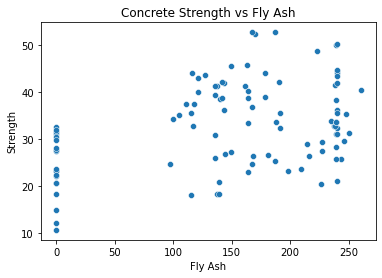

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="FlyAsh", y="Strength", data = con )
plt.title("Concrete Strength vs Fly Ash")
plt.xlabel("Fly Ash");

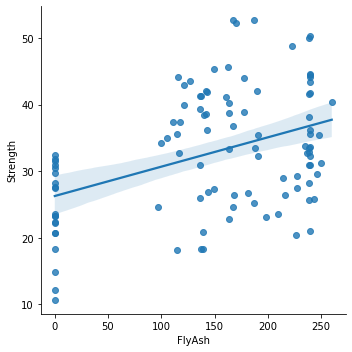

In [7]:
sns.lmplot(x="FlyAsh", y="Strength", data = con);

#### the relationship between concrete strength and fly ash is only weakly linear

## Coefficient of Correlation

In [8]:
from scipy import stats
stats.pearsonr(con['Strength'], con['FlyAsh'])

(0.4063903168877309, 2.049723037870364e-05)

In [9]:
# we get two numbers:

# Pearson’s r (0.4063)
# A p-value. This is the probability that the true value of r is zero (no correlation).

In [10]:
# We conclude based on this that there is weak linear relationship between concrete strength and fly ash 
# but not so weak that we should conclude the variables are uncorrelated. 
# In other words, it seems that fly ash does have some influence on concrete strength.

## Correlation Matrix

In [11]:
cormat =  round(con.corr(), 2)
cormat


,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Strength
No,1.00,-0.03,-0.08,0.34,-0.14,-0.33,0.22,-0.31,0.19
Cement,-0.03,1.00,-0.24,-0.49,0.22,-0.11,-0.31,0.06,0.46
Slag,-0.08,-0.24,1.00,-0.32,-0.03,0.31,-0.22,-0.18,-0.33
FlyAsh,0.34,-0.49,-0.32,1.00,-0.24,-0.14,0.17,-0.28,0.41
Water,-0.14,0.22,-0.03,-0.24,1.00,-0.16,-0.60,0.11,-0.22
SP,-0.33,-0.11,0.31,-0.14,-0.16,1.00,-0.10,0.06,-0.02
CoarseAgg,0.22,-0.31,-0.22,0.17,-0.60,-0.10,1.00,-0.49,-0.15
FineAgg,-0.31,0.06,-0.18,-0.28,0.11,0.06,-0.49,1.00,-0.17
Strength,0.19,0.46,-0.33,0.41,-0.22,-0.02,-0.15,-0.17,1.00


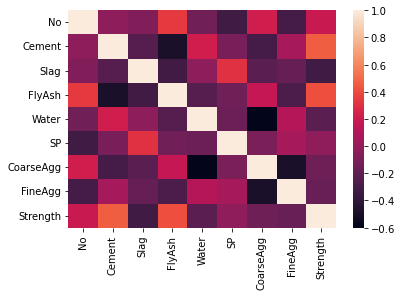

In [12]:
sns.heatmap(cormat);

# Regression

### Regression analysis is a reliable method of identifying which variables have impact on a topic of interest. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other.

## Simple Linear Regression

### Regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.

In [13]:
con.head()

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain,Strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990000
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272286
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450356
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080000
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820000


In [14]:
import statsmodels.api as sm
Y = con['Strength']
X = con['FlyAsh']
X.head()

0    105.0
1    191.0
2    191.0
3    190.0
4    144.0
Name: FlyAsh, dtype: float64

In [15]:
X = sm.add_constant(X)
X.head()

C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,FlyAsh
0,1.0,105.0
1,1.0,191.0
2,1.0,191.0
3,1.0,190.0
4,1.0,144.0


In [16]:
model = sm.OLS(Y,X, missing = 'drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     19.98
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           2.05e-05
Time:                        12:28:46   Log-Likelihood:                -365.58
No. Observations:                 103   AIC:                             735.2
Df Residuals:                     101   BIC:                             740.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2763      1.691     15.543      0.000      22.923      29.630
FlyAsh         0.0440      0.010      4.470      0.000       0.025       0.064
==============================================================================
Omnibus:                        5.741   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                2.716
Skew:                           0.064   Prob(JB):                        0.257
Kurtosis:                       2.215   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals

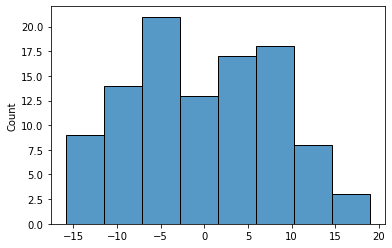

In [17]:
sns.histplot(model_result.resid);

In [18]:
from scipy import stats
mu,std = stats.norm.fit(model_result.resid)
mu, std

(-1.1106541791978265e-14, 8.41827570024307)

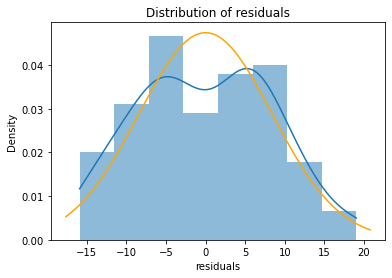

In [19]:
import numpy as np
fig, ax = plt.subplots()

#plotting residuals
sns.histplot(x=model_result.resid, stat='density', linewidth=0, kde=True)
ax.set(title = 'Distribution of residuals', xlabel = 'residuals')

# plot corresponding normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
sns.lineplot(x=x, y=p, color="orange");

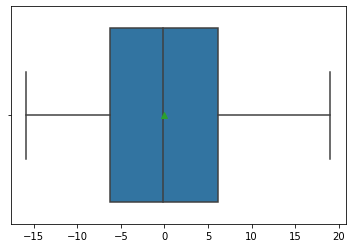

In [20]:
# Here we see a reasonable distribution with the mean close to the median (indicating symmetry).

sns.boxplot(x=model_result.resid, showmeans = True);

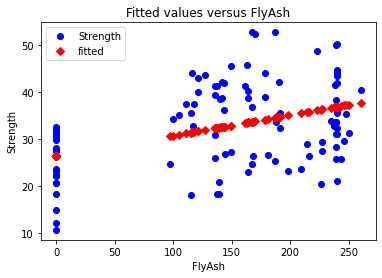

In [21]:
sm.graphics.plot_fit(model_result,1,vlines=False);

### Since the R-squared of this model is only 0.165, it should come as no surprise that the fit model is not particularly good.

# Mulitple Linear Regression

In [22]:
Y = con['Strength']
X = con[['No','Cement','Slag','FlyAsh','Water','SP','CoarseAgg','FineAgg']]
X = sm.add_constant(X)

C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Kitchen Sink Model

In [23]:
ks = sm.OLS(Y,X)
ks_res = ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     56.21
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.68e-32
Time:                        12:28:48   Log-Likelihood:                -284.49
No. Observations:                 103   AIC:                             587.0
Df Residuals:                      94   BIC:                             610.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.2867    142.786      0.807      0.421    -168.218     398.791
No            -0.0077      0.021     -0.372      0.711      -0.049       0.033
Cement         0.0826      0.047      1.758      0.082      -0.011       0.176
Slag          -0.0225      0.065     -0.346      0.730      -0.152       0.107
FlyAsh         0.0668      0.048      1.380      0.171      -0.029       0.163
Water         -0.2165      0.142     -1.520      0.132      -0.499       0.066
SP             0.2518      0.213      1.181      0.241      -0.172       0.675
CoarseAgg     -0.0479      0.056     -0.857      0.393      -0.159       0.063
FineAgg       -0.0356      0.057     -0.622      0.536      -0.149       0.078
==============================================================================
Omnibus:                        2.168   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                2.182
Skew:                          -0.309   Prob(JB):                        0.336
Kurtosis:                       2.644   Cond. No.                     4.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Creating a dummy matrix

AirEntrain_d = pd.get_dummies(con['AirEntrain'], prefix = 'AirEntrain', drop_first = True)
AirEntrain_d.head(3)

,AirEntrain_Yes
0,0
1,1
2,1


In [27]:
fullX = pd.concat([X, AirEntrain_d['AirEntrain_Yes']], axis = 1)
fullX.head()

,const,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain_Yes
0,1.0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,0
1,1.0,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,1
2,1.0,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1
3,1.0,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,0
4,1.0,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,0


In [28]:
# Running Full Regression

ks2 = sm.OLS(Y, fullX)
ks2_res = ks2.fit()
ks2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           5.83e-48
Time:                        12:35:13   Log-Likelihood:                -242.38
No. Observations:                 103   AIC:                             504.8
Df Residuals:                      93   BIC:                             531.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             41.5039     95.616      0.434      0.665    -148.371     231.379
No                -0.0173      0.014     -1.251      0.214      -0.045       0.010
Cement             0.0962      0.031      3.063      0.003       0.034       0.159
Slag               0.0157      0.044      0.359      0.720      -0.071       0.102
FlyAsh             0.0869      0.032      2.684      0.009       0.023       0.151
Water             -0.1380      0.095     -1.446      0.151      -0.328       0.051
SP                 0.1902      0.143      1.334      0.186      -0.093       0.473
CoarseAgg         -0.0160      0.037     -0.428      0.669      -0.090       0.058
FineAgg           -0.0021      0.038     -0.054      0.957      -0.078       0.074
AirEntrain_Yes    -6.0682      0.559    -10.848      0.000      -7.179      -4.957
==============================================================================
Omnibus:                        4.216   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                3.634
Skew:                           0.351   Prob(JB):                        0.162
Kurtosis:                       3.594   Cond. No.                     4.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
import statsmodels.formula.api as smf
ksf = smf.ols('Strength ~ No + Cement + Slag + Water + CoarseAgg + FlyAsh + SP + FineAgg + AirEntrain', data = con)
ksf_res = ksf.fit()
ksf_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           5.83e-48
Time:                        12:40:47   Log-Likelihood:                -242.38
No. Observations:                 103   AIC:                             504.8
Df Residuals:                      93   BIC:                             531.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            41.5039     95.616      0.434      0.665    -148.371     231.379
AirEntrain[T.Yes]    -6.0682      0.559    -10.848      0.000      -7.179      -4.957
No                   -0.0173      0.014     -1.251      0.214      -0.045       0.010
Cement                0.0962      0.031      3.063      0.003       0.034       0.159
Slag                  0.0157      0.044      0.359      0.720      -0.071       0.102
Water                -0.1380      0.095     -1.446      0.151      -0.328       0.051
CoarseAgg            -0.0160      0.037     -0.428      0.669      -0.090       0.058
FlyAsh                0.0869      0.032      2.684      0.009       0.023       0.151
SP                    0.1902      0.143      1.334      0.186      -0.093       0.473
FineAgg              -0.0021      0.038     -0.054      0.957      -0.078       0.074
==============================================================================
Omnibus:                        4.216   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                3.634
Skew:                           0.351   Prob(JB):                        0.162
Kurtosis:                       3.594   Cond. No.                     4.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

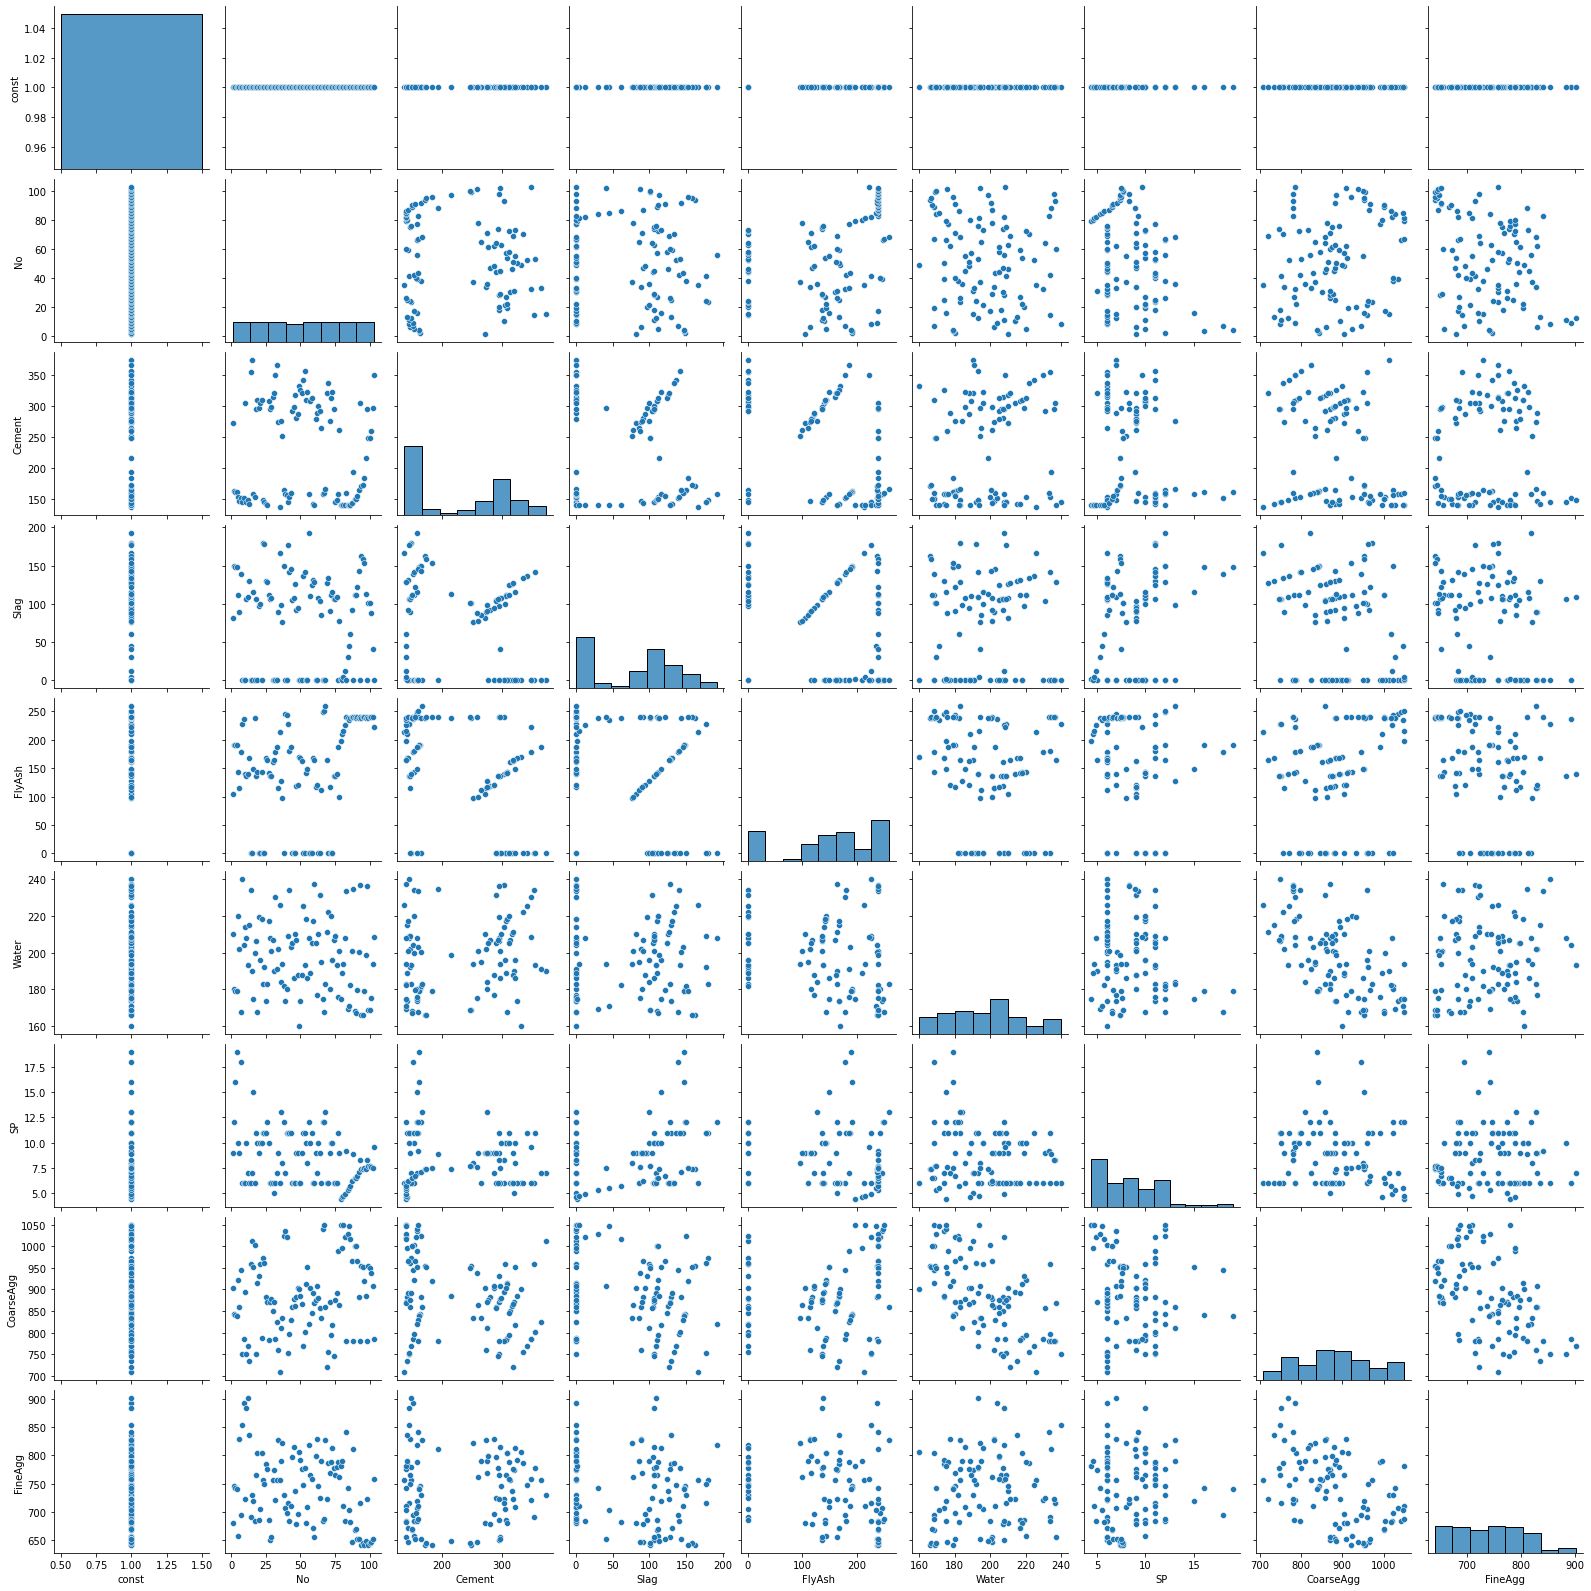

In [33]:
sns.pairplot(X);

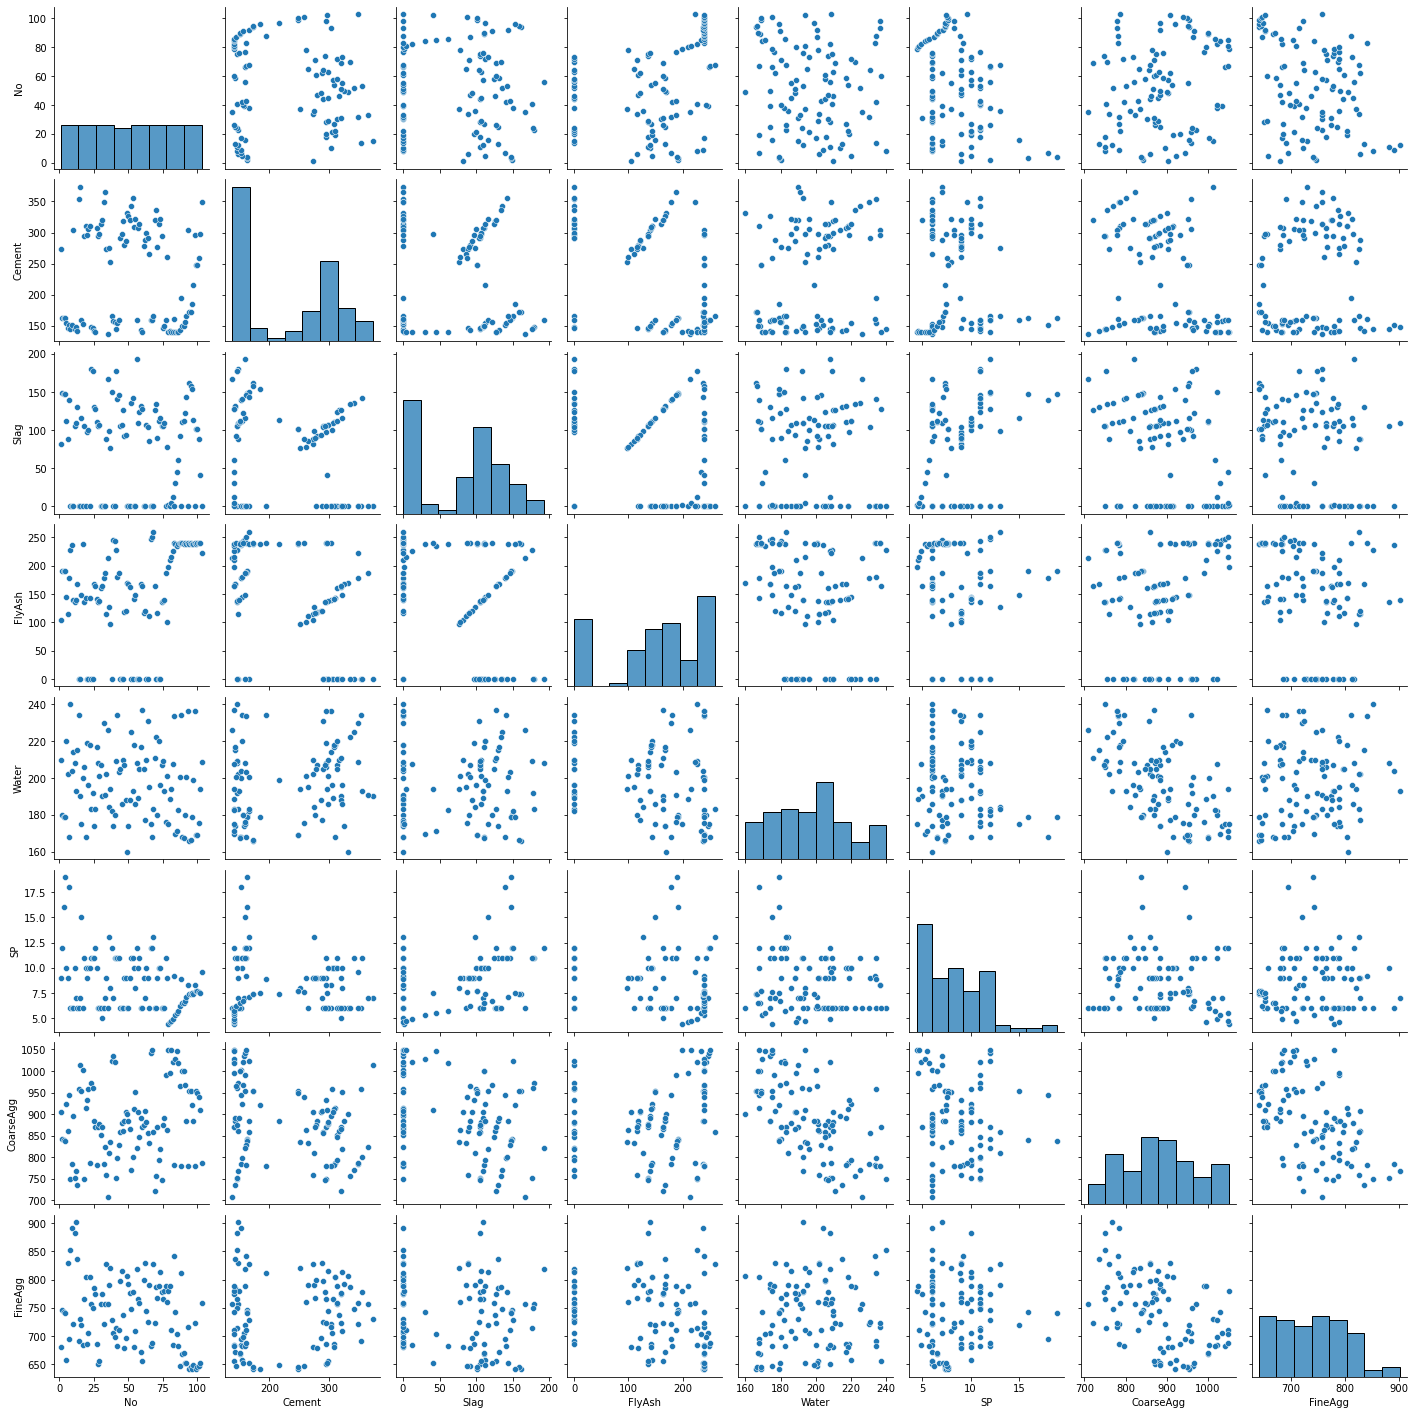

In [34]:
sns.pairplot(X[['No',
               'Cement',
               'Slag',
               'FlyAsh',
               'Water',
               'SP',
               'CoarseAgg',
               'FineAgg']]);

### Correlation Matrix

In [35]:
round(con.corr(),2)

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Strength
No,1.00,-0.03,-0.08,0.34,-0.14,-0.33,0.22,-0.31,0.19
Cement,-0.03,1.00,-0.24,-0.49,0.22,-0.11,-0.31,0.06,0.46
Slag,-0.08,-0.24,1.00,-0.32,-0.03,0.31,-0.22,-0.18,-0.33
FlyAsh,0.34,-0.49,-0.32,1.00,-0.24,-0.14,0.17,-0.28,0.41
Water,-0.14,0.22,-0.03,-0.24,1.00,-0.16,-0.60,0.11,-0.22
SP,-0.33,-0.11,0.31,-0.14,-0.16,1.00,-0.10,0.06,-0.02
CoarseAgg,0.22,-0.31,-0.22,0.17,-0.60,-0.10,1.00,-0.49,-0.15
FineAgg,-0.31,0.06,-0.18,-0.28,0.11,0.06,-0.49,1.00,-0.17
Strength,0.19,0.46,-0.33,0.41,-0.22,-0.02,-0.15,-0.17,1.00


# Model Refinement

In [36]:
X1 = fullX.drop(columns='FineAgg', inplace=False)
mod1 = sm.OLS(Y, X1)
mod1_res = mod1.fit()
mod1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     142.2
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           4.73e-49
Time:                        13:24:49   Log-Likelihood:                -242.38
No. Observations:                 103   AIC:                             502.8
Df Residuals:                      94   BIC:                             526.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             36.4090      8.674      4.197      0.000      19.186      53.632
No                -0.0178      0.011     -1.674      0.097      -0.039       0.003
Cement             0.0978      0.005     18.070      0.000       0.087       0.109
Slag               0.0180      0.006      2.819      0.006       0.005       0.031
FlyAsh             0.0887      0.005     17.367      0.000       0.079       0.099
Water             -0.1330      0.019     -7.131      0.000      -0.170      -0.096
SP                 0.1950      0.109      1.791      0.077      -0.021       0.411
CoarseAgg         -0.0141      0.005     -2.964      0.004      -0.023      -0.005
AirEntrain_Yes    -6.0706      0.555    -10.946      0.000      -7.172      -4.970
==============================================================================
Omnibus:                        4.255   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.680
Skew:                           0.352   Prob(JB):                        0.159
Kurtosis:                       3.601   Cond. No.                     3.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


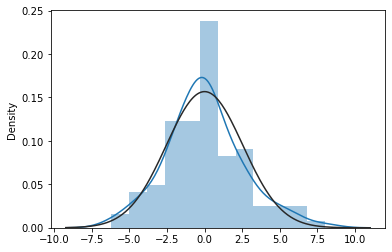

In [50]:
# diagnostic plots to determine whether the resulting regression model is valid.

sns.distplot(mod1_res.resid, fit = stats.norm );

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


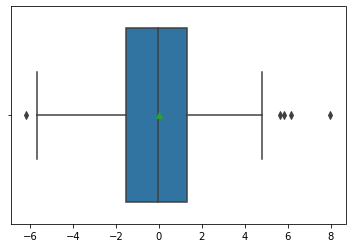

In [54]:
sns.boxplot(mod1_res.resid, showmeans=True);

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


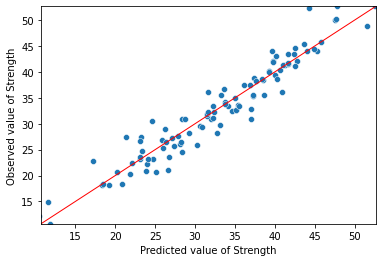

In [59]:
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(mod1_res.fittedvalues, Y)
ax.set(ylim=(Y_min,Y_max))
ax.set(xlim=(Y_min,Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1);